In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import scipy.cluster.hierarchy as sch

In [56]:
df=pd.read_csv("data.csv")
df_custom=df
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df_custom.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [59]:
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Genre': 'gandre',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})


In [60]:
df.columns 

Index(['customer_id', 'gandre', 'age', 'annual_income', 'spending_score'], dtype='object')

In [61]:
df.shape

(200, 5)

In [62]:
df.isnull().sum()

customer_id       0
gandre            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [63]:
df1 = df[["annual_income", "spending_score"]]


In [64]:
df1.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


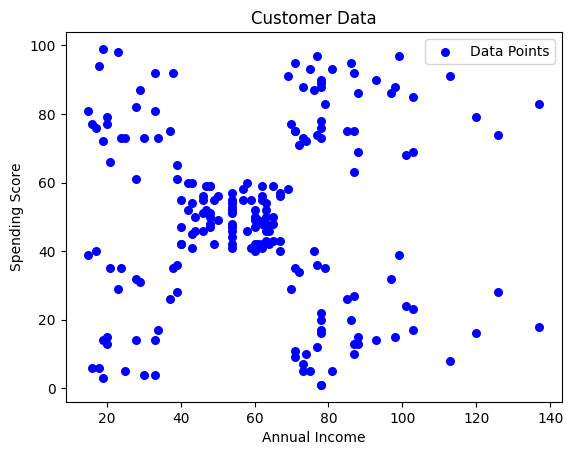

In [65]:
plt.scatter(df1['annual_income'], df1['spending_score'], s=30, c='blue', label='Data Points')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Data')
plt.legend()
plt.show()

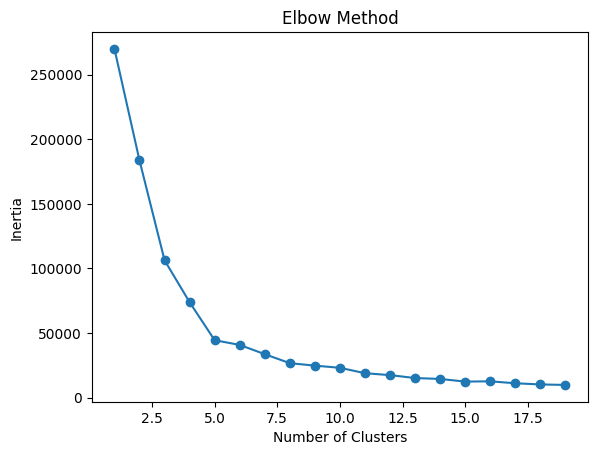

In [66]:

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [67]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df1)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Display the first few rows
print(df.head())

   customer_id  gandre  age  annual_income  spending_score  Cluster
0            1    Male   19             15              39        2
1            2    Male   21             15              81        2
2            3  Female   20             16               6        2
3            4  Female   23             16              77        2
4            5  Female   31             17              40        2


Custome model for K-means Clustring 

In [68]:
import random
class KMean:
    def __init__(self, n_clusters=5,max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    def assign_clusters(self,X):
        cluster_group=[]
        distances=[]

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance=min(distances)
            index=distances.index(min_distance)
            cluster_group.append(index)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroids(self,X,cluster_group):
        new_centroids=[]
        cluster_types=np.unique(cluster_group)
        for cluster in cluster_types:
            new_centroids.append(X[cluster_group==cluster].mean(axis=0))
        return np.array(new_centroids)
    
    def fit_function(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]
        for i in range(self.max_iter):
            cluster_group=self.assign_clusters(X)
            old_centroids=self.centroids
            self.centroids=self.move_centroids(X,cluster_group)
            if (old_centroids==self.centroids).all():
                break
        return cluster_group
        


In [69]:
X=df1.values
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
kmeans_custom = KMean(n_clusters=5, max_iter=100)
clusters = kmeans_custom.fit_function(X_scaled)



# Add the cluster labels to the original data
df_custom['Cluster'] = clusters

# Display the first few rows
print(df_custom.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        0  
2        3  
3        2  
4        3  


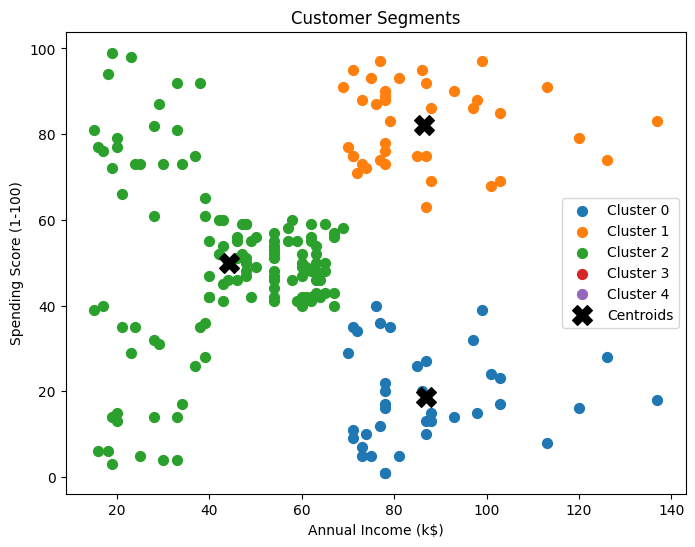

In [71]:

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    clustered_data = df1[df['Cluster'] == cluster]
    plt.scatter(
        clustered_data['annual_income'],
        clustered_data['spending_score'],
        label=f'Cluster {cluster}',
        s=50
    )

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()


Plot Using Custom Model 

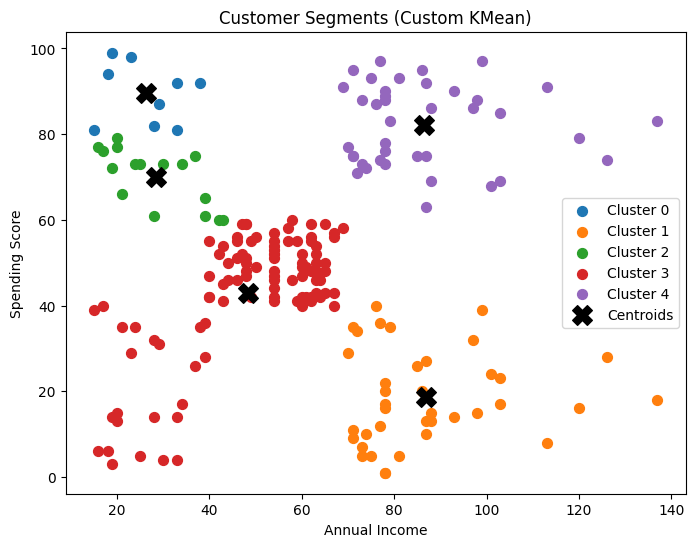

In [72]:
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    clustered_data = df1[df_custom['Cluster'] == cluster]
    plt.scatter(
        clustered_data['annual_income'],
        clustered_data['spending_score'],
        label=f'Cluster {cluster}',
        s=50
    )

# Plot centroids (back to original scale)
centroids_original = scaler.inverse_transform(kmeans_custom.centroids)
plt.scatter(
    centroids_original[:, 0], centroids_original[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments (Custom KMean)')
plt.legend()
plt.show()


Buildin Model for DBSCAN

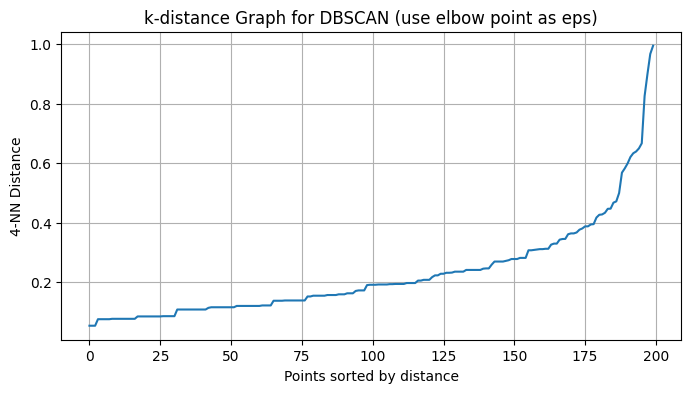

In [ ]:


# Set min_samples = 2 → so we use 2nd nearest neighbor
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort the k-th distances
k_distances = np.sort(distances[:, k - 1])  # Use k-th neighbor
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN Distance")
plt.title("k-distance Graph for DBSCAN (use elbow point as eps)")
plt.grid(True)
plt.show()


C:\Users\aaa\AppData\Local\Temp\ipykernel_18348\2760443922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DBSCAN_Cluster'] = db_clusters


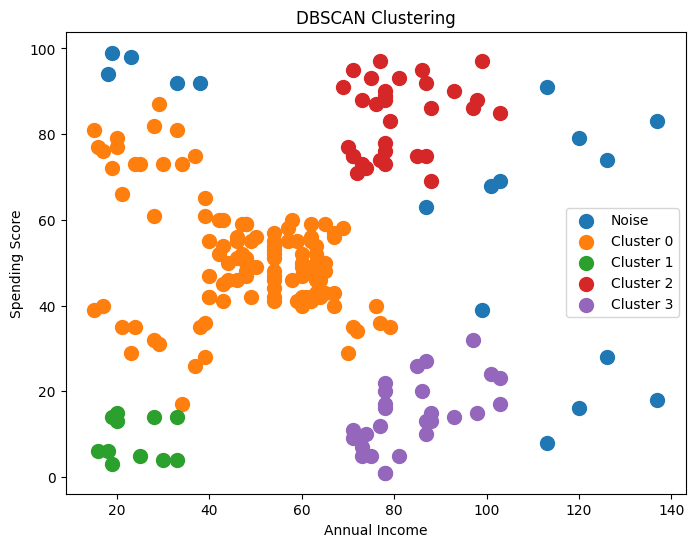

In [94]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.38, min_samples=5)  # adjust eps as needed
db_clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df1['DBSCAN_Cluster'] = db_clusters

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(db_clusters):
    clustered_data = df1[df1['DBSCAN_Cluster'] == cluster]
    plt.scatter(
        clustered_data['annual_income'],
        clustered_data['spending_score'],
        label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
        s=100
    )

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Plot Using Custom Model 

In [106]:
from collections import deque

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean(X[point_idx], X[i]) <= eps:  # <= to match sklearn
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(X, point_idx, eps)

    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        queue = deque(neighbors)

        while queue:
            current_point = queue.popleft()

            if labels[current_point] == -1:
                labels[current_point] = cluster_id  # Border point

            if labels[current_point] != -2:
                continue  # Already visited

            labels[current_point] = cluster_id
            current_neighbors = region_query(X, current_point, eps)

            if len(current_neighbors) >= min_samples:
                for n in current_neighbors:
                    if labels[n] == -2:  # Only unvisited
                        queue.append(n)
        return True

def dbscan(X, eps, min_samples):
    labels = [-2] * len(X)  # -2 means unvisited
    cluster_id = 0

    for i in range(len(X)):
        if labels[i] != -2:
            continue
        if expand_cluster(X, labels, i, cluster_id, eps, min_samples):
            cluster_id += 1
    return np.array(labels)

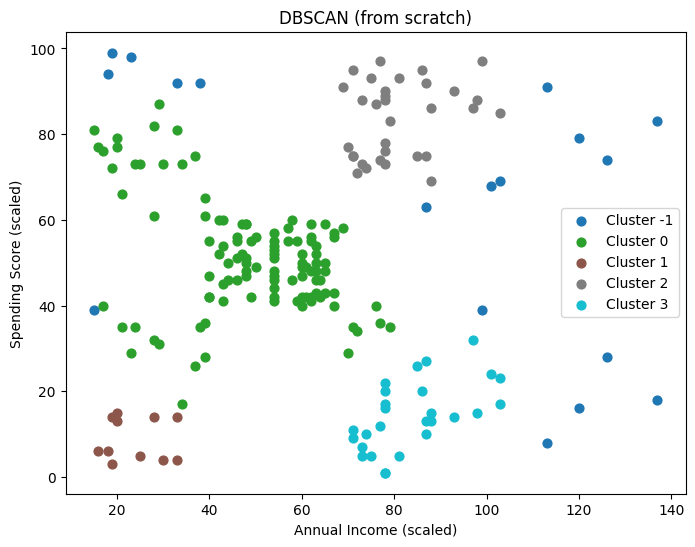

In [108]:

eps = 0.38
min_samples = 5
dbscan_labels = dbscan(X_scaled, eps, min_samples)

# Plot Results
plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = dbscan_labels == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}', s=40, color=color)

plt.legend()
plt.title('DBSCAN (from scratch)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


H-Clustring

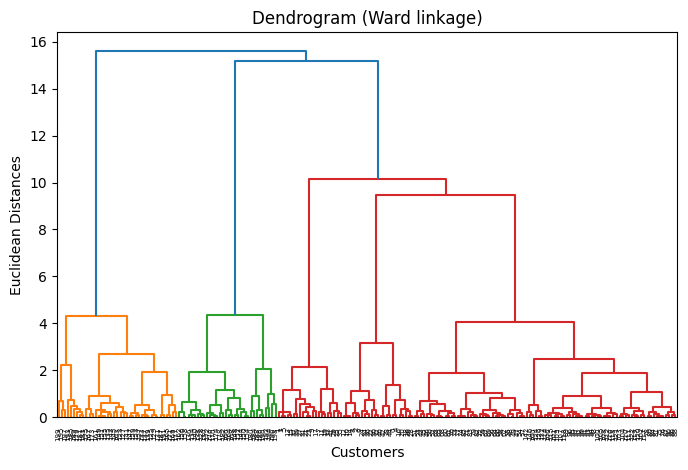

In [98]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

C:\Users\aaa\AppData\Local\Temp\ipykernel_18348\4235769342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hierarchical_Cluster'] = hier_clusters


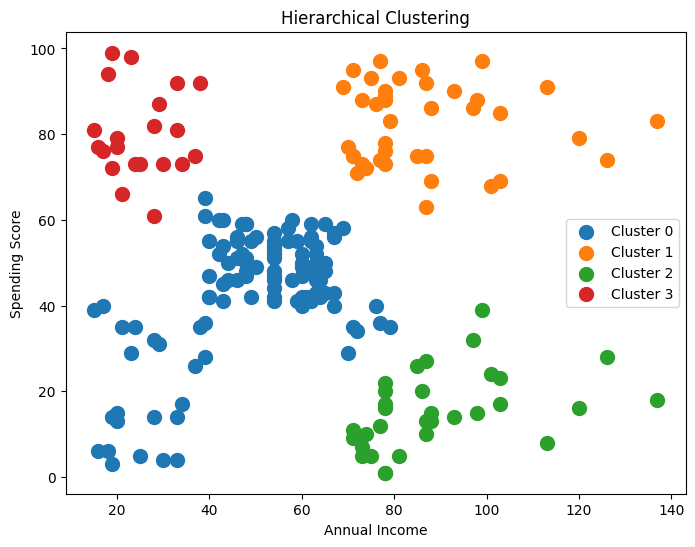

In [99]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_clusters = agglo.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df1['Hierarchical_Cluster'] = hier_clusters

# Plot Agglomerative Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(hier_clusters):
    clustered_data = df1[df1['Hierarchical_Cluster'] == cluster]
    plt.scatter(
        clustered_data['annual_income'],
        clustered_data['spending_score'],
        label=f'Cluster {cluster}',
        s=100
    )

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [109]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def ward_distance(c1, c2):
    combined = np.vstack((c1, c2))
    mean_all = np.mean(combined, axis=0)
    var_total = np.sum((combined - mean_all) ** 2)
    
    mean_c1 = np.mean(c1, axis=0)
    mean_c2 = np.mean(c2, axis=0)
    var_c1 = np.sum((c1 - mean_c1) ** 2)
    var_c2 = np.sum((c2 - mean_c2) ** 2)
    
    return var_total - var_c1 - var_c2


In [110]:
clusters = [{i} for i in range(len(X_scaled))]
cluster_points = {i: [X[i]] for i in range(len(X_scaled))}

In [111]:
k = 4

while len(clusters) > k:
    min_dist = float('inf')
    to_merge = (-1, -1)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            c1_points = np.vstack([cluster_points[idx] for idx in clusters[i]])
            c2_points = np.vstack([cluster_points[idx] for idx in clusters[j]])
            dist = ward_distance(c1_points, c2_points)

            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

    i, j = to_merge
    new_cluster = clusters[i] | clusters[j]
    clusters.append(new_cluster)
    cluster_points[len(cluster_points)] = np.vstack(
        [cluster_points[idx] for idx in clusters[i] | clusters[j]]
    )
    clusters.pop(max(i, j))
    clusters.pop(min(i, j))

C:\Users\aaa\AppData\Local\Temp\ipykernel_18348\2167419006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hierarchical_Cluster'] = labels


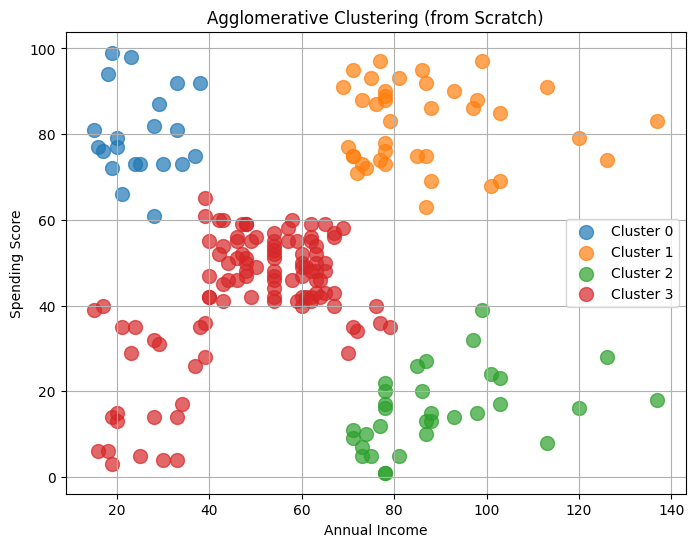

In [112]:
labels = np.zeros(len(X_scaled), dtype=int)
for cluster_id, cluster in enumerate(clusters):
    for idx in cluster:
        labels[idx] = cluster_id

df1['Hierarchical_Cluster'] = labels

plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    clustered_data = df1[df1['Hierarchical_Cluster'] == cluster]
    plt.scatter(
        clustered_data['annual_income'],
        clustered_data['spending_score'],
        label=f'Cluster {cluster}',
        s=100,
        alpha=0.7
    )

plt.title('Agglomerative Clustering (from Scratch)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()